<a href="https://colab.research.google.com/github/aslanidze/Machine_Learning/blob/main/LogisticRegression(BreastCancer).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [36]:
from google.colab import files
Uploaded = files.upload ()

Saving wdbc.csv to wdbc (1).csv


In [37]:
# Importing necessary libraries
import pandas as pd  # For data manipulation and analysis
import numpy as np  # For numerical operations
import matplotlib.pyplot as plt  # For data visualization
import seaborn as sns  # For advanced visualizations
from sklearn.model_selection import train_test_split  # For splitting data into train and test sets
from sklearn.preprocessing import StandardScaler  # For feature scaling
from sklearn.linear_model import LogisticRegression  # Logistic Regression model
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report  # Evaluation metrics

In [38]:
data = pd.read_csv("wdbc.csv")
data.head()

,ID,Diagnosis,Radius_mean,Texture_mean,Perimeter_mean,Area_mean,Smoothness_mean,Compactness_mean,Concavity_mean,Concave_points_mean,...,Radius_worst,Texture_worst,Perimeter_worst,Area_worst,Smoothness_worst,Compactness_worst,Concavity_worst,Concave_points_worst,Symmetry_worst,Fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


# Define the file path of the dataset

In [39]:
# Define column names based on the Wisconsin Breast Cancer Dataset documentation
columns = [
    "ID", "Diagnosis",
    "Radius_mean", "Texture_mean", "Perimeter_mean", "Area_mean", "Smoothness_mean",
    "Compactness_mean", "Concavity_mean", "Concave_points_mean", "Symmetry_mean", "Fractal_dimension_mean",
    "Radius_se", "Texture_se", "Perimeter_se", "Area_se", "Smoothness_se",
    "Compactness_se", "Concavity_se", "Concave_points_se", "Symmetry_se", "Fractal_dimension_se",
    "Radius_worst", "Texture_worst", "Perimeter_worst", "Area_worst", "Smoothness_worst",
    "Compactness_worst", "Concavity_worst", "Concave_points_worst", "Symmetry_worst", "Fractal_dimension_worst"
]

In [40]:
# Drop the ID column as it is not relevant for the analysis
data_cleaned = data.drop(columns=["ID"])

In [41]:
# Convert the 'Diagnosis' column from categorical to numerical
# Map 'M' (Malignant) to 1 and 'B' (Benign) to 0
data_cleaned["Diagnosis"] = data_cleaned["Diagnosis"].map({"M": 1, "B": 0})

In [42]:
# Save the cleaned dataset to a new CSV file for further use
data_cleaned.to_csv("wdbc_cleaned.csv", index=False)

In [43]:
# Print a message indicating successful preprocessing
print("Data preprocessing complete. Cleaned data saved to 'wdbc_cleaned.csv'.")

Data preprocessing complete. Cleaned data saved to 'wdbc_cleaned.csv'.


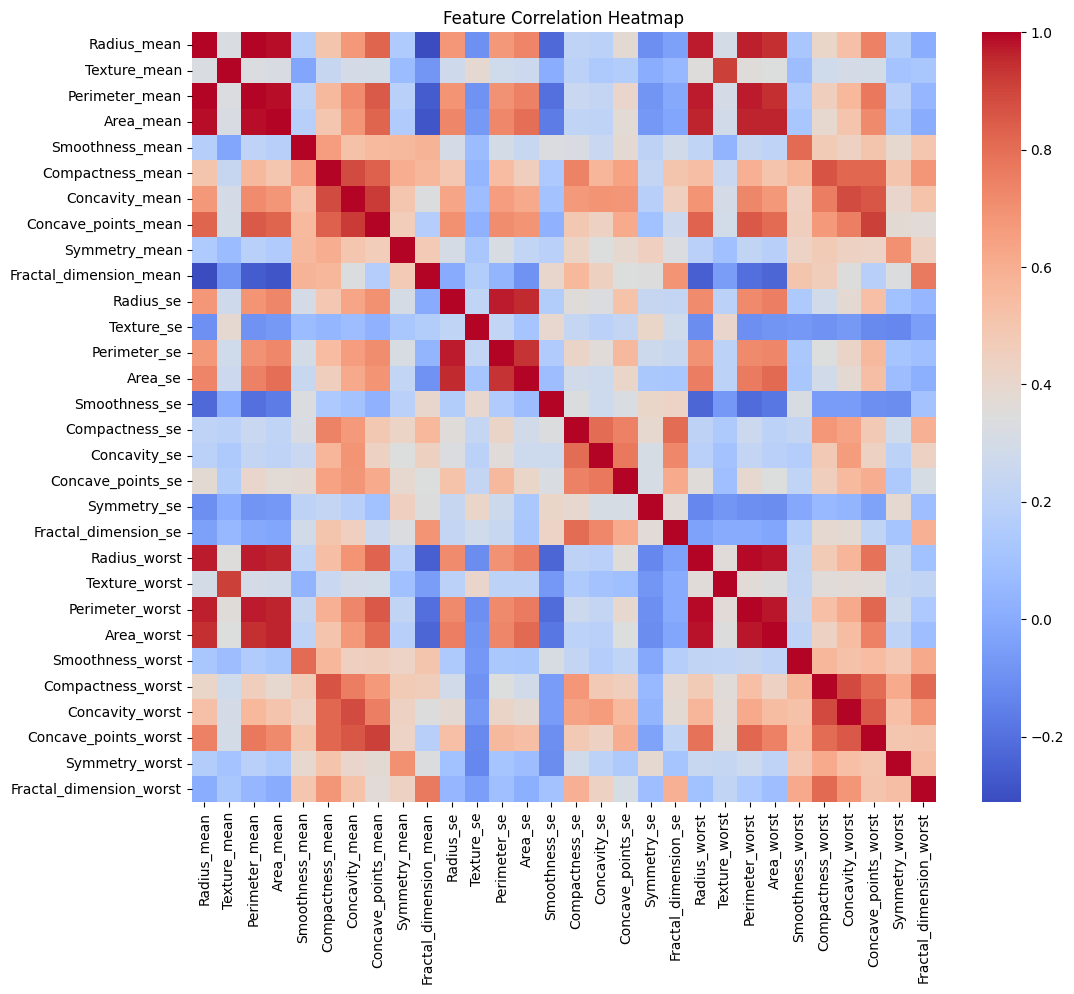

Selected Features: Index(['Radius_mean', 'Perimeter_mean', 'Area_mean', 'Concavity_mean',
       'Concave_points_mean', 'Radius_worst', 'Perimeter_worst', 'Area_worst',
       'Concavity_worst', 'Concave_points_worst'],
      dtype='object')


In [44]:

from sklearn.feature_selection import SelectKBest, f_classif
# Separate features (X) and target (y)
X = data_cleaned.drop(columns=["Diagnosis"])
y = data_cleaned["Diagnosis"]

# 1. Correlation heatmap to visualize multicollinearity
plt.figure(figsize=(12, 10))
correlation_matrix = X.corr()
sns.heatmap(correlation_matrix, cmap="coolwarm", annot=False)
plt.title("Feature Correlation Heatmap")
plt.show()

# 2. Feature Selection using ANOVA F-test
selector = SelectKBest(score_func=f_classif, k=10)  # Select top 10 features
X_new = selector.fit_transform(X, y)

# Get the selected feature names
selected_features = X.columns[selector.get_support()]
print("Selected Features:", selected_features)

# 3. Standardize the features (optional for logistic regression)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_new)

In [45]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
import numpy as np

# Create a DataFrame with selected features
X_selected = data_cleaned[selected_features]

# Compute VIF for each feature
vif_data = pd.DataFrame()
vif_data["Feature"] = X_selected.columns
vif_data["VIF"] = [variance_inflation_factor(X_selected.values, i) for i in range(X_selected.shape[1])]

# Show VIF values
print(vif_data.sort_values(by="VIF", ascending=False))

                Feature           VIF
0           Radius_mean  23712.517820
1        Perimeter_mean  22779.357910
5          Radius_worst   4681.607375
6       Perimeter_worst   2272.948424
7            Area_worst    550.752996
2             Area_mean    523.982998
4   Concave_points_mean     88.317117
9  Concave_points_worst     68.813973
3        Concavity_mean     62.571022
8       Concavity_worst     37.921288


In [46]:
# List of features to keep after removing highly correlated ones
selected_final_features = ["Concave_points_mean", "Concave_points_worst", "Concavity_mean", "Concavity_worst"]

# Create a new DataFrame with selected features
X_final = data_cleaned[selected_final_features]
y = data_cleaned["Diagnosis"]

# Save the final selected features for modeling
X_final.to_csv("wdbc_selected_features.csv", index=False)

print("Feature selection complete. Final dataset saved as 'wdbc_selected_features.csv'.")
print("Final selected features:", selected_final_features)

Feature selection complete. Final dataset saved as 'wdbc_selected_features.csv'.
Final selected features: ['Concave_points_mean', 'Concave_points_worst', 'Concavity_mean', 'Concavity_worst']


Model Accuracy: 0.9825

Confusion Matrix:
 [[72  0]
 [ 2 40]]

Classification Report:
               precision    recall  f1-score   support

           0       0.97      1.00      0.99        72
           1       1.00      0.95      0.98        42

    accuracy                           0.98       114
   macro avg       0.99      0.98      0.98       114
weighted avg       0.98      0.98      0.98       114



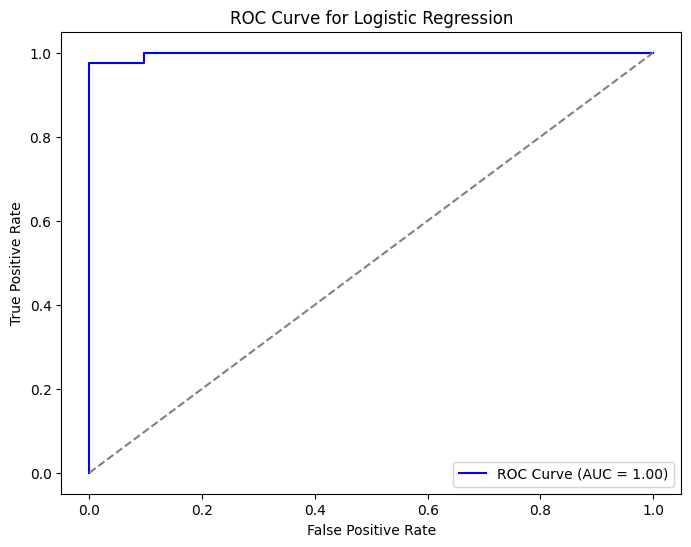

In [48]:
# Split the dataset into training (80%) and testing (20%) sets, ensuring class distribution is maintained
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Standardize the features to ensure all variables are on the same scale
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize and train the Logistic Regression model
model = LogisticRegression(C=0.1, solver="liblinear")
model.fit(X_train_scaled, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test_scaled)
y_prob = model.predict_proba(X_test_scaled)[:, 1]  # Extract probability for the positive class

# Evaluate the model using accuracy, confusion matrix, and classification report
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print(f"Model Accuracy: {accuracy:.4f}")
print("\nConfusion Matrix:\n", conf_matrix)
print("\nClassification Report:\n", class_report)
from sklearn.metrics import roc_curve, auc
# Compute ROC Curve and AUC to assess classification performance
fpr, tpr, _ = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

# Plot ROC Curve to visualize model performance
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color="blue", label=f"ROC Curve (AUC = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], color="gray", linestyle="--")  # Reference diagonal line for random guessing
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve for Logistic Regression")
plt.legend()
plt.show()

In [49]:
# Define a new threshold for classification
threshold = 0.4  # Example: lower threshold to increase recall

# Predict class labels based on the new threshold
y_pred_adjusted = (y_prob >= new_threshold).astype(int)

# Evaluate model with the adjusted threshold
adjusted_conf_matrix = confusion_matrix(y_test, y_pred_adjusted)
adjusted_class_report = classification_report(y_test, y_pred_adjusted)

print(f"Confusion Matrix (Threshold = {threshold}):\n", adjusted_conf_matrix)
print("\nClassification Report (Threshold = {new_threshold}):\n", adjusted_class_report)

Confusion Matrix (Threshold = 0.4):
 [[72  0]
 [ 1 41]]

Classification Report (Threshold = {new_threshold}):
               precision    recall  f1-score   support

           0       0.99      1.00      0.99        72
           1       1.00      0.98      0.99        42

    accuracy                           0.99       114
   macro avg       0.99      0.99      0.99       114
weighted avg       0.99      0.99      0.99       114



In [50]:
# Define a new threshold for classification
threshold = 0.3 # Example: lower threshold to increase recall

# Predict class labels based on the new threshold
y_pred_adjusted = (y_prob >= new_threshold).astype(int)

# Evaluate model with the adjusted threshold
adjusted_conf_matrix = confusion_matrix(y_test, y_pred_adjusted)
adjusted_class_report = classification_report(y_test, y_pred_adjusted)

print(f"Confusion Matrix (Threshold = {threshold}):\n", adjusted_conf_matrix)
print("\nClassification Report (Threshold = {new_threshold}):\n", adjusted_class_report)

Confusion Matrix (Threshold = 0.3):
 [[72  0]
 [ 1 41]]

Classification Report (Threshold = {new_threshold}):
               precision    recall  f1-score   support

           0       0.99      1.00      0.99        72
           1       1.00      0.98      0.99        42

    accuracy                           0.99       114
   macro avg       0.99      0.99      0.99       114
weighted avg       0.99      0.99      0.99       114

